In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/Cat-Vision'

/content/drive/MyDrive/Colab Notebooks/Cat-Vision


## **Problem Statement**

Build an image-recognition algorithm that can correctly classify pictures as **cat** or **non-cat**.

## **Importing Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from keras.optimizers import SGD
from PIL import Image

## **Preparing Dataset**

We have a dataset ("data.h5") containing:
- a training set of images labeled as cat (y=1) or non-cat (y=0)
- a test set of images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). 
Thus, each image is a square (height = num_px) and (width = num_px) 

In [4]:
train_data = h5py.File('datasets/train_catvnoncat.h5', 'r')
test_data = h5py.File('datasets/test_catvnoncat.h5', 'r')

In [5]:
# checking keys in train dataset
print(train_data.keys())

# checking keys in test dataset
print(test_data.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [6]:
X_train = np.array(train_data.get('train_set_x')) # extracting train set features
y_train = np.array(train_data.get('train_set_y')) # extracting train set labels

X_test = np.array(test_data.get('test_set_x')) # extracting test set features
y_test = np.array(test_data.get('test_set_y')) # extracting test set labels

y_train = y_train.reshape((y_train.shape[0], 1)) 
y_test = y_test.reshape((y_test.shape[0], 1))

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((209, 64, 64, 3), (209, 1), (50, 64, 64, 3), (50, 1))

In [8]:
classes = np.array(test_data["list_classes"][:]) # the list of classes
print(classes)

[b'non-cat' b'cat']


y = [1], it's a 'cat' picture


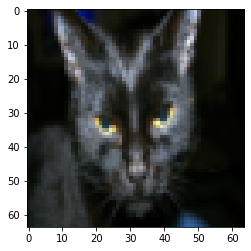

In [9]:
# Example of a picture
index = 25
plt.imshow(X_train[index])
print(f"y = {str(y_train[index])}, it's a '{classes[np.squeeze(y_train[index])].decode('utf-8')}' picture")

## Preprocess

In [10]:
m_train = X_train.shape[0] # number os training examples
m_test = X_test.shape[0] # number of test examples
num_px = X_train.shape[1] # height/width of each image

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)

X_train shape: (209, 64, 64, 3)
y_train shape: (209, 1)
X_test shape: (50, 64, 64, 3)
y_test shape: (50, 1)


For convenience, we should now reshape each image (num_px, num_px, 3) in a numpy-array of shape (num_px  ∗  num_px  ∗  3, 1). After this, our training (and test) dataset is a numpy-array where each row represents a flattened image.

In [11]:
X_train = X_train.reshape(m_train, -1)
X_test = X_test.reshape(m_test, -1)

X_train.shape, X_test.shape

((209, 12288), (50, 12288))

Standardization of dataset

In [12]:
X_train = X_train / 255.
X_test = X_test / 255.

## **Model Building**

**1-layer model using logistic regression**

In [13]:
# model architecture
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12289     
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


## **Compiling Model**

In [15]:
sgd = SGD(learning_rate=0.005)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

## **Training Model**

In [16]:
model_history = model.fit(X_train, y_train, epochs=2000, batch_size=X_train.shape[0], validation_data=(X_test, y_test))

Epoch 1/2000
1/1 [==============================] - 13s 13s/step - loss: 0.8571 - accuracy: 0.3684 - val_loss: 1.9342 - val_accuracy: 0.3400
Epoch 2/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.9873 - accuracy: 0.6555 - val_loss: 0.6400 - val_accuracy: 0.6600
Epoch 3/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.7501 - accuracy: 0.4163 - val_loss: 1.5640 - val_accuracy: 0.3400
Epoch 4/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.8372 - accuracy: 0.6555 - val_loss: 0.6172 - val_accuracy: 0.6600
Epoch 5/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.7676 - accuracy: 0.3971 - val_loss: 1.6653 - val_accuracy: 0.3400
Epoch 6/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8743 - accuracy: 0.6555 - val_loss: 0.6097 - val_accuracy: 0.6800
Epoch 7/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.7585 - accuracy: 0.4067 - val_loss: 1.6480 - val_accuracy: 0.3400
Epoch 8/2000


## **Evaluation**

In [17]:
# getting predictions in form of class & probabilities
predictions = model.predict_classes(X_test)
prediction_probabilities = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
# accuracy on test set
from sklearn.metrics import accuracy_score

print(f"Accuracy on test set: {accuracy_score(y_test, predictions)}")

Accuracy on test set: 0.7


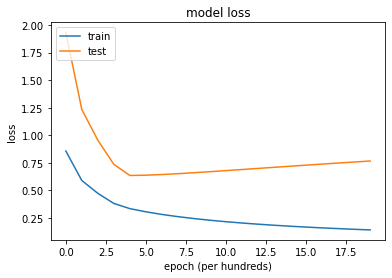

In [19]:
# summarize history of loss
loss = [val for index, val in enumerate(model_history.history["loss"]) if index%100 == 0]
val_loss = [val for index, val in enumerate(model_history.history["val_loss"]) if index%100 == 0]
# plt.plot(model_history.history["loss"])
# plt.plot(model_history.history["val_loss"])
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.xlabel('epoch (per hundreds)')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

we can see training loss goes down but test loss is increasing, so there is clearly overfitting. Also our accuracy on test set is **70%**

**4-layer model**

In [20]:
# model architecture
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                245780    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 245,973
Trainable params: 245,973
Non-trainable params: 0
_________________________________________________________________


In [22]:
sgd = SGD(learning_rate=0.0075)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=2500, batch_size=X_train.shape[0], validation_data=(X_test, y_test))

Streaming output truncated to the last 5000 lines.
Epoch 1/2500
1/1 [==============================] - 2s 2s/step - loss: 0.7033 - accuracy: 0.3923 - val_loss: 0.6863 - val_accuracy: 0.6200
Epoch 2/2500
1/1 [==============================] - 0s 65ms/step - loss: 0.6979 - accuracy: 0.4211 - val_loss: 0.6896 - val_accuracy: 0.5800
Epoch 3/2500
1/1 [==============================] - 0s 67ms/step - loss: 0.6960 - accuracy: 0.4928 - val_loss: 0.6890 - val_accuracy: 0.6000
Epoch 4/2500
1/1 [==============================] - 0s 65ms/step - loss: 0.6951 - accuracy: 0.5072 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 5/2500
1/1 [==============================] - 0s 86ms/step - loss: 0.6956 - accuracy: 0.4163 - val_loss: 0.6970 - val_accuracy: 0.4600
Epoch 6/2500
1/1 [==============================] - 0s 63ms/step - loss: 0.6943 - accuracy: 0.4498 - val_loss: 0.6984 - val_accuracy: 0.4400
Epoch 7/2500
1/1 [==============================] - 0s 69ms/step - loss: 0.6932 - accuracy: 0.4641 - val_

In [24]:
# getting predictions in form of class & probabilities
predictions = model.predict_classes(X_test)
prediction_probabilities = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
print(f"Accuracy on test set: {accuracy_score(y_test, predictions)}")

Accuracy on test set: 0.62


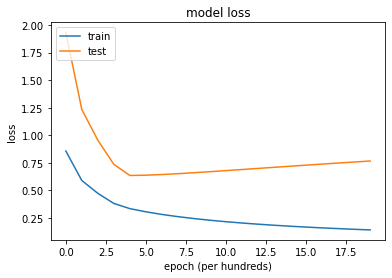

In [26]:
# summarize history of loss
loss = [val for index, val in enumerate(model_history.history["loss"]) if index%100 == 0]
val_loss = [val for index, val in enumerate(model_history.history["val_loss"]) if index%100 == 0]
# plt.plot(model_history.history["loss"])
# plt.plot(model_history.history["val_loss"])
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.xlabel('epoch (per hundreds)')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Test with your own image**

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


y = 1, your algorithm predicts a "cat" picture.


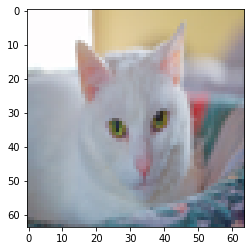

In [27]:
# change this to the name of your image file
my_image = "my_image2.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3))
my_predicted_image = model.predict_classes(image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")